In [5]:
%matplotlib inline

import pandas as pd

r = pd.read_csv( 'ratings.csv' )
tr = pd.read_csv( 'to_read.csv' )
b = pd.read_csv( 'books.csv' )

t = pd.read_csv( 'tags.csv' )
bt = pd.read_csv( 'book_tags.csv')

In [34]:
len(b)

10000

### Ratings

In [2]:
r.head(20)

,user_id,book_id,rating
0,1,258,5
1,2,4081,4
2,2,260,5
3,2,9296,5
4,2,2318,3
5,2,26,4
6,2,315,3
7,2,33,4
8,2,301,5
9,2,2686,5


In [3]:
r["rating"].value_counts()

4    2139018
5    1983093
3    1370916
2     359257
1     124195
Name: rating, dtype: int64

In [4]:
len(r[r["rating"]>3])

4122111

In [5]:
len(r[r["rating"]<=3])

1854368

In [6]:
r.tail(10)

,user_id,book_id,rating
5976469,21879,6720,5
5976470,10596,1786,4
5976471,50229,8137,2
5976472,23863,8020,4
5976473,49925,330,5
5976474,49925,510,5
5976475,49925,528,4
5976476,49925,722,4
5976477,49925,949,5
5976478,49925,1023,4


In [7]:
r_sorted = r.sort_values('user_id')
r_sorted.head(30)

,user_id,book_id,rating
0,1,258,5
999485,1,140,3
999486,1,869,4
999487,1,2679,3
999488,1,1310,4
999489,1,414,4
81,1,2738,3
80,1,47,3
79,1,867,3
78,1,1796,5


In [8]:
r_sorted.tail(30)

,user_id,book_id,rating
5404331,53424,219,5
5404330,53424,347,5
5404329,53424,292,5
5404328,53424,56,3
5404327,53424,52,3
5404326,53424,151,5
5404325,53424,49,3
5404324,53424,1,4
5404323,53424,307,4
5404322,53424,89,4


In [9]:
len(r_sorted)

5976479

In [10]:
r_trimmed = r_sorted[r_sorted["user_id"] < 10000]

In [11]:
r_trimmed.tail(20)

,user_id,book_id,rating
555255,9999,228,2
708123,9999,652,3
555269,9999,2274,5
703295,9999,20,5
555267,9999,1299,3
735788,9999,1273,3
555278,9999,1367,5
736274,9999,559,3
686829,9999,322,5
686811,9999,563,3


In [12]:
len(r_trimmed)

1168905

In [13]:
r_trimmed.to_csv(path_or_buf="ratings_trimmed.csv", sep=',')

Ratings are sorted chronologically, oldest first.

In [14]:
len(r)

5976479

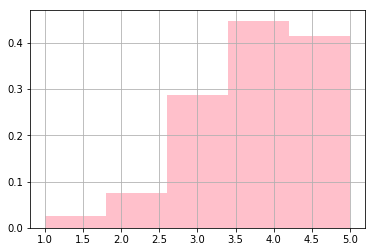

In [70]:
r.rating.hist( bins = 5 , color=["pink"], density= True)

It appears that 4 is the most popular rating. There are relatively few ones and twos.

### To read
These are the books users marked "to read".


In [16]:
tr.head()

,user_id,book_id
0,9,8
1,15,398
2,15,275
3,37,7173
4,34,380


In [17]:
len(tr)

912705

Most books have been marked to read by somebody. Majority of the users have some books marked to read.

In [18]:
len(tr.book_id.unique())

9986

In [19]:
len(tr.user_id.unique())

48871

### Books

In [2]:
b.head()

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


In [13]:
b.columns

Index(['book_id', 'goodreads_book_id', 'best_book_id', 'work_id',
       'books_count', 'isbn', 'isbn13', 'authors', 'original_publication_year',
       'original_title', 'title', 'language_code', 'average_rating',
       'ratings_count', 'work_ratings_count', 'work_text_reviews_count',
       'ratings_1', 'ratings_2', 'ratings_3', 'ratings_4', 'ratings_5',
       'image_url', 'small_image_url'],
      dtype='object')

In [6]:
b_new = b[['book_id', 'authors', 'original_publication_year',
       'original_title', 'language_code']]
b_new.head()

,book_id,authors,original_publication_year,original_title,language_code
0,1,Suzanne Collins,2008.0,The Hunger Games,eng
1,2,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,eng
2,3,Stephenie Meyer,2005.0,Twilight,en-US
3,4,Harper Lee,1960.0,To Kill a Mockingbird,eng
4,5,F. Scott Fitzgerald,1925.0,The Great Gatsby,eng


In [31]:
len(b)

10000

In [32]:
#Using tags information 
book_tags = pd.read_csv('book_tags.csv', encoding = "ISO-8859-1")
book_tags.head()

,goodreads_book_id,tag_id,count
0,1,30574,167697
1,1,11305,37174
2,1,11557,34173
3,1,8717,12986
4,1,33114,12716


In [33]:
len(book_tags)

999912

In [34]:
tags = pd.read_csv('tags.csv')
tags.tail()

,tag_id,tag_name
34247,34247,Ｃhildrens
34248,34248,Ｆａｖｏｒｉｔｅｓ
34249,34249,Ｍａｎｇａ
34250,34250,ＳＥＲＩＥＳ
34251,34251,ｆａｖｏｕｒｉｔｅｓ


In [35]:
tags_join_DF = pd.merge(book_tags, tags, left_on='tag_id', right_on='tag_id', how='outer')
tags_join_DF.head()

,goodreads_book_id,tag_id,count,tag_name
0,1,30574,167697,to-read
1,2,30574,24549,to-read
2,3,30574,496107,to-read
3,5,30574,11909,to-read
4,6,30574,298,to-read


In [38]:
len(tags_join_DF)

999912

In [39]:
len(b)

10000

In [40]:
#Join tags:
books_with_tags = pd.merge(b, tags_join_DF, left_on='book_id', right_on='goodreads_book_id', how='outer')
books_with_tags.head()

,book_id,goodreads_book_id_x,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url,goodreads_book_id_y,tag_id,count,tag_name
0,1.0,2767052.0,2767052.0,2792775.0,272.0,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,127936.0,560092.0,1481305.0,2706317.0,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...,1.0,30574.0,167697.0,to-read
1,1.0,2767052.0,2767052.0,2792775.0,272.0,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,127936.0,560092.0,1481305.0,2706317.0,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...,1.0,11305.0,37174.0,fantasy
2,1.0,2767052.0,2767052.0,2792775.0,272.0,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,127936.0,560092.0,1481305.0,2706317.0,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...,1.0,11557.0,34173.0,favorites
3,1.0,2767052.0,2767052.0,2792775.0,272.0,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,127936.0,560092.0,1481305.0,2706317.0,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...,1.0,8717.0,12986.0,currently-reading
4,1.0,2767052.0,2767052.0,2792775.0,272.0,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,127936.0,560092.0,1481305.0,2706317.0,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...,1.0,33114.0,12716.0,young-adult


In [44]:
len(books_with_tags)

1009100

In [41]:
books_with_tags["book_id"].value_counts()

2.0       100
7667.0    100
4630.0    100
4631.0    100
1426.0    100
6424.0    100
8725.0    100
7663.0    100
4633.0    100
3.0       100
7661.0    100
3368.0    100
7968.0    100
2530.0    100
8248.0    100
2183.0    100
25.0      100
7214.0    100
5015.0    100
5697.0    100
3273.0    100
5695.0    100
4645.0    100
7036.0    100
2526.0    100
5693.0    100
1911.0    100
5452.0    100
2430.0    100
8694.0    100
         ... 
1884.0      1
5534.0      1
5533.0      1
1383.0      1
5531.0      1
3880.0      1
5530.0      1
5529.0      1
1382.0      1
5525.0      1
756.0       1
5539.0      1
1385.0      1
644.0       1
5549.0      1
1389.0      1
5555.0      1
5554.0      1
347.0       1
5551.0      1
5550.0      1
1387.0      1
5541.0      1
5547.0      1
5546.0      1
5545.0      1
1386.0      1
5543.0      1
5542.0      1
4374.0      1
Name: book_id, Length: 10000, dtype: int64

In [55]:
df_tag_count = books_with_tags.pivot_table(values="count", index="book_id", columns="tag_name", aggfunc="sum", fill_value=0)
df_tag_count.head()

tag_name,-,--12-,--33-,--62-,-d-c--,-fictitious,-n-y--,-post,-psychology-,-specific,...,ميلان-كونديرا,نسخ-إلكترونية,نسخة-ورقية,هاروكي-موراكامي,ورقي,کودک-و-نوجوان,日本文学,日本語,Ｃhildrens,Ｆａｖｏｒｉｔｅｓ
book_id,,,,,,,,,,,,,,,,,,,,,
1.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
len(df_tag_count)

812

In [50]:
import numpy as np
tag_count = np.array(df_tag_count)

28267946

In [43]:
len(df_tag_count)

812

In [22]:
books_with_tags.get_dummies(books_with_tags["tag_name"])

AttributeError: 'DataFrame' object has no attribute 'get_dummies'

In [44]:
def write_full_tags(tag_name, count): 
    ft = ""
    for i in (range(0, count)): 
        ft +=tag_name
        ft +=" "
    
    return ft

books_with_tags["full_tags"] = books_with_tags.apply(lambda row: write_full_tags(row["tag_name"], row["count"]), axis=1)

In [45]:
books_with_tags.head()

,book_id,goodreads_book_id_x,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_3,ratings_4,ratings_5,image_url,small_image_url,goodreads_book_id_y,tag_id,count,tag_name,full_tags
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...,1,30574,167697,to-read,to-read to-read to-read to-read to-read to-rea...
1,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...,1,11305,37174,fantasy,fantasy fantasy fantasy fantasy fantasy fantas...
2,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...,1,11557,34173,favorites,favorites favorites favorites favorites favori...
3,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...,1,8717,12986,currently-reading,currently-reading currently-reading currently-...
4,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...,1,33114,12716,young-adult,young-adult young-adult young-adult young-adul...


In [29]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()

X = vect.fit_transform(books_with_tags['tag_name'])
# X = vect.fit_transform(b_new.authors_list.str.join(' '))

# tf1 = TfidfVectorizer(analyzer='word',ngram_range=(1, 2),min_df=0, stop_words='english')
# tfidf_matrix1 = tf1.fit_transform(books_with_tags['tag_name'])
# tfidf_matrix1.shape

In [30]:
X.shape

(81200, 4021)

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# b_scaled = pd.DataFrame(scaler.fit_transform(b_new['original_publication_year']), columns=b_new.columns)
# b_scaled.head()
b_new['year_scaled'] = scaler.fit_transform(b_new['original_publication_year'].values.reshape(-1,1))

C:\Users\melania\Anaconda3\envs\recommendation-systems\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [8]:

b_new.head()

,book_id,authors,original_publication_year,original_title,language_code,year_scaled
0,1,Suzanne Collins,2008.0,The Hunger Games,eng,0.997611
1,2,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,eng,0.994691
2,3,Stephenie Meyer,2005.0,Twilight,en-US,0.996814
3,4,Harper Lee,1960.0,To Kill a Mockingbird,eng,0.984869
4,5,F. Scott Fitzgerald,1925.0,The Great Gatsby,eng,0.975577


In [18]:
b_new.language_code.value_counts()

eng      6341
en-US    2070
en-GB     257
ara        64
en-CA      58
fre        25
ind        21
spa        20
ger        13
per         7
jpn         7
pol         6
por         6
en          4
dan         3
nor         3
fil         2
ita         2
vie         1
mul         1
rus         1
rum         1
swe         1
tur         1
nl          1
Name: language_code, dtype: int64

In [19]:
def map_to_en(x):
    if x in ['en', 'en-CA', 'en-GB', 'en-US', 'eng']: 
        return "en"
    else:
        return x
    
b_new["language_code"] = b_new["language_code"].apply(map_to_en)
b_new["language_code"].value_counts()

C:\Users\melania\Anaconda3\envs\text-mining\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


en     8730
ara      64
fre      25
ind      21
spa      20
ger      13
jpn       7
per       7
por       6
pol       6
nor       3
dan       3
fil       2
ita       2
rus       1
mul       1
vie       1
rum       1
swe       1
tur       1
nl        1
Name: language_code, dtype: int64

In [20]:
# use pd.concat to join the new columns with your original dataframe
#b_new = pd.concat([b_new,pd.get_dummies(b_new['language_code'], prefix='lang')],axis=1)

# now drop the original 'country' column (you don't need it anymore)
b_new.drop(['language_code'],axis=1, inplace=True)

C:\Users\melania\Anaconda3\envs\text-mining\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [21]:
b_new.head()

,book_id,authors,original_publication_year,original_title,year_scaled
0,1,Suzanne Collins,2008.0,The Hunger Games,0.997611
1,2,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,0.994691
2,3,Stephenie Meyer,2005.0,Twilight,0.996814
3,4,Harper Lee,1960.0,To Kill a Mockingbird,0.984869
4,5,F. Scott Fitzgerald,1925.0,The Great Gatsby,0.975577


In [9]:
def string_to_list(string): 
    return string.split(", ")
b_new["authors_list"] = b_new["authors"].apply(string_to_list)
b_new.head()

C:\Users\melania\Anaconda3\envs\recommendation-systems\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,book_id,authors,original_publication_year,original_title,language_code,year_scaled,authors_list
0,1,Suzanne Collins,2008.0,The Hunger Games,eng,0.997611,[Suzanne Collins]
1,2,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,eng,0.994691,"[J.K. Rowling, Mary GrandPré]"
2,3,Stephenie Meyer,2005.0,Twilight,en-US,0.996814,[Stephenie Meyer]
3,4,Harper Lee,1960.0,To Kill a Mockingbird,eng,0.984869,[Harper Lee]
4,5,F. Scott Fitzgerald,1925.0,The Great Gatsby,eng,0.975577,[F. Scott Fitzgerald]


In [11]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()
X = vect.fit_transform(b_new.authors_list.str.join(' '))

b_new = b_new.join(pd.DataFrame(X.toarray(), columns=vect.get_feature_names()))


In [12]:
df_authors = pd.DataFrame(X.toarray(), columns=vect.get_feature_names())
df_authors.columns

Index(['aardema', 'aaron', 'aaronovitch', 'ab', 'abagnale', 'abarbanell',
       'abbas', 'abbey', 'abbi', 'abbott',
       ...
       '村上', '桜坂洋', '樋口', '武内', '田中メカ', '直子', '石田', '神尾葉子', '義博', '신경숙'],
      dtype='object', length=6193)

In [13]:
df_authors.head()

,aardema,aaron,aaronovitch,ab,abagnale,abarbanell,abbas,abbey,abbi,abbott,...,村上,桜坂洋,樋口,武内,田中メカ,直子,石田,神尾葉子,義博,신경숙
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
#Reduce dimentionality
from sklearn.decomposition import TruncatedSVD

df_authors_reduced = TruncatedSVD(n_components=100, random_state=0).fit_transform(df_authors)

In [23]:
#Save to txt 
import numpy
numpy.savetxt("df_authors_reduced.csv", df_authors_reduced, delimiter=",")

In [24]:
b_new.head()

,book_id,authors,original_publication_year,original_title,year_scaled,authors_list,aardema,aaron,aaronovitch,ab,...,村上,桜坂洋,樋口,武内,田中メカ,直子,石田,神尾葉子,義博,신경숙
0,1,Suzanne Collins,2008.0,The Hunger Games,0.997611,[Suzanne Collins],0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,0.994691,"[J.K. Rowling, Mary GrandPré]",0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Stephenie Meyer,2005.0,Twilight,0.996814,[Stephenie Meyer],0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,Harper Lee,1960.0,To Kill a Mockingbird,0.984869,[Harper Lee],0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,F. Scott Fitzgerald,1925.0,The Great Gatsby,0.975577,[F. Scott Fitzgerald],0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
#b_new.drop(['authors'],axis=1, inplace=True)
#b_new.drop(['authors_list'],axis=1, inplace=True)
b_new.drop(['original_publication_year'],axis=1, inplace=True)
b_new.drop(['original_title'],axis=1, inplace=True)
b_feat = b_new.drop(['book_id'],axis=1)
b_new.head()

,book_id,year_scaled,lang_ara,lang_dan,lang_en,lang_fil,lang_fre,lang_ger,lang_ind,lang_ita,...,lang_nor,lang_per,lang_pol,lang_por,lang_rum,lang_rus,lang_spa,lang_swe,lang_tur,lang_vie
0,1,0.997611,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0.994691,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0.996814,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0.984869,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0.975577,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
b_feat.head()
b_head

,year_scaled,lang_ara,lang_dan,lang_en,lang_fil,lang_fre,lang_ger,lang_ind,lang_ita,lang_jpn,...,lang_nor,lang_per,lang_pol,lang_por,lang_rum,lang_rus,lang_spa,lang_swe,lang_tur,lang_vie
0,0.997611,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.994691,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.996814,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.984869,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.975577,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
b_new.columns

Index(['book_id', 'authors', 'original_publication_year', 'year_scaled',
       'lang_ara', 'lang_dan', 'lang_en', 'lang_fil', 'lang_fre', 'lang_ger',
       ...
       '村上', '桜坂洋', '樋口', '武内', '田中メカ', '直子', '石田', '神尾葉子', '義博', '신경숙'],
      dtype='object', length=6219)

In [18]:
b_feat.to_csv("books_features_no_authors.csv",index=False)

In [30]:
b_new.head()

,book_id,year_scaled,lang_ara,lang_dan,lang_en,lang_fil,lang_fre,lang_ger,lang_ind,lang_ita,...,村上,桜坂洋,樋口,武内,田中メカ,直子,石田,神尾葉子,義博,신경숙
0,1,0.997611,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0.994691,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0.996814,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0.984869,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0.975577,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
b_feat = b_new.drop(['book_id'],axis=1)

In [20]:
len(b_feat)

10000

In [26]:
b_feat.head()

,year_scaled,lang_ara,lang_dan,lang_en,lang_fil,lang_fre,lang_ger,lang_ind,lang_ita,lang_jpn,...,村上,桜坂洋,樋口,武内,田中メカ,直子,石田,神尾葉子,義博,신경숙
0,0.997611,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.994691,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.996814,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.984869,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.975577,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
b_feat = b_feat.dropna()

In [31]:
indices = pd.Series(b.index, index=b['original_title']).drop_duplicates()

In [34]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim2 = cosine_similarity(b_feat, b_feat)

In [35]:
def get_recommendations(title, cosine_sim=cosine_sim2):
    # Get the index of the movie that matches the title
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return b['original_title'].iloc[movie_indices]

In [41]:
get_recommendations("The Hunger Games")

16                               Catching Fire
19                                  Mockingjay
505                                    The One
4712                                       NaN
3176    The Realms of the Gods (Immortals, #4)
3708         Robert Ludlum's The Bourne Legacy
1528                     A Bruxa de Portobello
2932                       The Spectacular Now
4020                          The Future of Us
7083                            Hollywood Dirt
Name: original_title, dtype: object

In [27]:

b_feat.shape[1]

6215

In [28]:
b_feat.to_csv("books_features.csv", index=False)

### User and book IDs

In [12]:
r.user_id.max()

53424

In [14]:
r.book_id.max()

10000

The IDs are contiguous.

In [47]:
assert( len( r.user_id.unique()) == r.user_id.max())
assert( len( r.book_id.unique()) == r.book_id.max())

### Reviews per book

Most books have a few hundred reviews, but some have as few as eight.

In [15]:
reviews_per_book = r.groupby( 'book_id' ).book_id.apply( lambda x: len( x ))
reviews_per_book.describe()

count    10000.000000
mean       597.647900
std       1267.289788
min          8.000000
25%        155.000000
50%        248.000000
75%        503.000000
max      22806.000000
Name: book_id, dtype: float64

In [16]:
reviews_per_book.sort_values().head( 10 )

book_id
7803     8
9345    11
9486    24
1935    33
9315    36
9553    41
8181    45
9479    48
9260    48
9705    50
Name: book_id, dtype: int64

### Reviews per user

All users have at least 19 reviews.

In [17]:
reviews_per_user = r.groupby( 'user_id' ).user_id.apply( lambda x: len( x ))
reviews_per_user.describe()

count    53424.000000
mean       111.868804
std         26.071224
min         19.000000
25%         96.000000
50%        111.000000
75%        128.000000
max        200.000000
Name: user_id, dtype: float64

In [18]:
reviews_per_user.sort_values().head( 10 )

user_id
34590    19
43675    20
40753    21
51725    21
32128    21
37640    22
16470    22
42736    22
48077    22
40299    22
Name: user_id, dtype: int64

### Tags

In [4]:
t.head()

,tag_id,tag_name
0,0,-
1,1,--1-
2,2,--10-
3,3,--12-
4,4,--122-


In [8]:
len(t)

34252

In [6]:
bt.head()

,goodreads_book_id,tag_id,count
0,1,30574,167697
1,1,11305,37174
2,1,11557,34173
3,1,8717,12986
4,1,33114,12716


Tag applications are sorted by goodreads_book_id ASC and by count DESC.

In [22]:
len(bt)

999912

Let us merge tag names into tag applications.

In [ ]:
bt = bt.merge( t, on = 'tag_id' )

Why don't we merge book titles for good measure.

In [31]:
bt = bt.merge( b[[ 'goodreads_book_id', 'title']], on = 'goodreads_book_id' )

It appears that there are some negative tag counts. Let's fix this.

In [40]:
bt['count'].describe()

count    999912.000000
mean        208.869633
std        3501.265173
min          -1.000000
25%           7.000000
50%          15.000000
75%          40.000000
max      596234.000000
Name: count, dtype: float64

In [41]:
bt.loc[ bt['count'] < 0, 'count'] = 0

Sample some popular book tags.

In [42]:
bt.sample( 10, weights = 'count')

,goodreads_book_id,tag_id,count,tag_name,title
248904,46164,5207,386,books-i-own,Tender Is the Night
661994,6261522,30574,74453,to-read,"The Body Finder (The Body Finder, #1)"
299800,73084,30574,2696,to-read,"Heaven, Texas (Chicago Stars, #2)"
10975,1232,14487,2973,historical-fiction,The Shadow of the Wind (The Cemetery of Forgot...
17200,2156,30574,220502,to-read,Persuasion
560394,821611,30574,104249,to-read,The Story of My Life
36284,4865,24410,69,professional-development,How to Win Friends and Influence People
766394,10194514,30574,122130,to-read,"Pushing the Limits (Pushing the Limits, #1)"
864774,16056862,2932,43,arranged-marriage,"The Unwanted Wife (Unwanted, #1)"
12114,1381,7457,14238,classics,The Odyssey


These are the most popular tags:

In [28]:
tag_counts = bt.groupby( 'tag_name' ).tag_name.count().sort_values( ascending = False )
tag_counts.head( 20 )

tag_name
to-read              9983
favorites            9881
owned                9858
books-i-own          9799
currently-reading    9776
library              9415
owned-books          9221
fiction              9097
to-buy               8692
kindle               8316
default              8239
ebook                8054
my-books             7561
audiobook            7242
ebooks               7203
wish-list            7192
my-library           7000
audiobooks           6862
i-own                6670
adult                6604
Name: tag_name, dtype: int64

### 1. Content based filtering: 
- use the info about the books that the person has already read (or is intersted in) 
-recommend books on that are in the same languages, similar years of publication, same author, have similar tags/ similar ratings on the books that a user has already read - weighted cosine similarity / kNN 
